In [3]:
import numpy as np
import pandas as pd
import warnings


In [4]:
warnings.filterwarnings('ignore')


In [5]:
column_names = ["user_id", "item_id", "ratings","timestamp"]
df = pd.read_csv("ml-100k/u.data" , sep= '\t', names= column_names)
print(df)

       user_id  item_id  ratings  timestamp
0          196      242        3  881250949
1          186      302        3  891717742
2           22      377        1  878887116
3          244       51        2  880606923
4          166      346        1  886397596
...        ...      ...      ...        ...
99995      880      476        3  880175444
99996      716      204        5  879795543
99997      276     1090        1  874795795
99998       13      225        2  882399156
99999       12      203        3  879959583

[100000 rows x 4 columns]


In [6]:
df.head()


,user_id,item_id,ratings,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [7]:
# to extract unique users
df['user_id'].nunique()

943

In [8]:
df['item_id'].nunique()

1682

In [9]:
# till this we dont know movie names
movies_title = pd.read_csv("ml-100k/u.item", sep= '\|', header = None, encoding='latin-1' )

In [10]:
movies_title.shape


(1682, 24)

In [17]:
# movies_title = movies_title[[0,1]]
# print(movies_title)

In [18]:
movies_title.columns = ['item_id','title']

In [19]:
movies_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [54]:
# To get movie names along with its id , we need to merge df and movies_title tables

In [55]:
#Here on is used is primary key i.e., on which key they should be merged. (item_id is common)

In [26]:
df = pd.merge(df,movies_title, on= 'item_id')

In [27]:
print(df)

       user_id  item_id  ratings  timestamp  \
0          196      242        3  881250949   
1           63      242        3  875747190   
2          226      242        5  883888671   
3          154      242        3  879138235   
4          306      242        5  876503793   
...        ...      ...      ...        ...   
99995      840     1674        4  891211682   
99996      655     1640        3  888474646   
99997      655     1637        3  888984255   
99998      655     1630        3  887428735   
99999      655     1641        3  887427810   

                                                   title  
0                                           Kolya (1996)  
1                                           Kolya (1996)  
2                                           Kolya (1996)  
3                                           Kolya (1996)  
4                                           Kolya (1996)  
...                                                  ...  
99995                 

In [28]:
df.head()

,user_id,item_id,ratings,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [29]:
df.tail()

,user_id,item_id,ratings,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


 Exploratory data Analysis

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [31]:
df.groupby('title').mean()[ratings]

NameError: name 'ratings' is not defined

In [32]:
# To check which movie has highest rating

In [33]:
df.groupby('title').mean()['ratings'].sort_values(ascending = False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: ratings, dtype: float64

In [34]:
# To check how many times the movie is watched 


In [35]:
df.groupby('title').count()['ratings'].sort_values(ascending= False)

title
Star Wars (1977)                      583
Contact (1997)                        509
Fargo (1996)                          508
Return of the Jedi (1983)             507
Liar Liar (1997)                      485
                                     ... 
Great Day in Harlem, A (1994)           1
Other Voices, Other Rooms (1997)        1
Good Morning (1971)                     1
Girls Town (1996)                       1
Á köldum klaka (Cold Fever) (1994)      1
Name: ratings, Length: 1664, dtype: int64

creating dataframe of ratings

In [36]:
ratings = pd.DataFrame(df.groupby('title').mean()['ratings'])

In [37]:
ratings.head()

,ratings
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [38]:
ratings['No of ratings'] =  pd.DataFrame(df.groupby('title').count()['ratings'])

In [39]:
ratings

,ratings,No of ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41
...,...,...
Young Guns II (1990),2.772727,44
"Young Poisoner's Handbook, The (1995)",3.341463,41
Zeus and Roxanne (1997),2.166667,6


In [65]:
ratings.sort_values(by = 'ratings', ascending = False)

,ratings,No of ratings
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


we need to plot histogram to see rating distribution, suppose if there is one rating of 5 star then we cannot say that movie is good. we have to consider lots of ratings

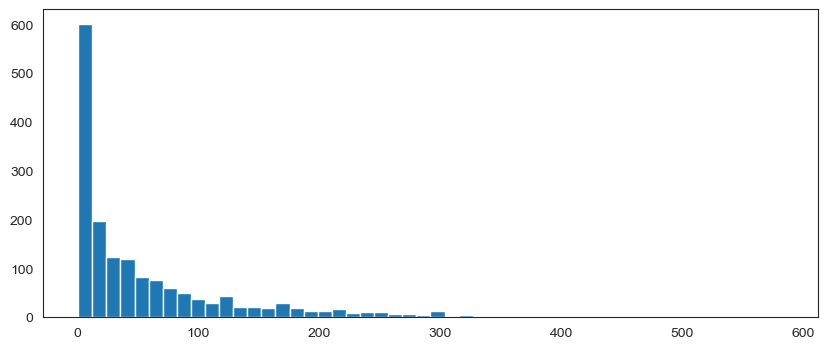

In [48]:
plt.figure(figsize=(10,4))    #10 is width and 4 is height of graph box
plt.hist(ratings['No of ratings'], bins = 50)
plt.show()

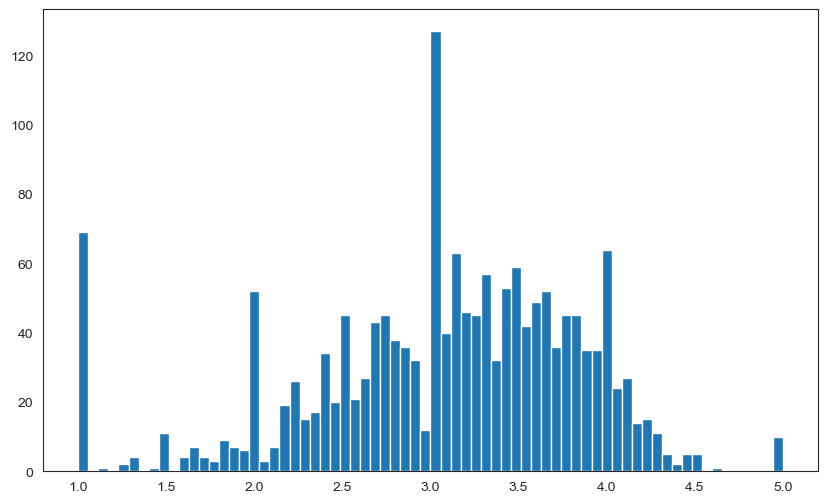

In [67]:
plt.figure(figsize=(10,6))
plt.hist(ratings['ratings'], bins = 70)
plt.show()

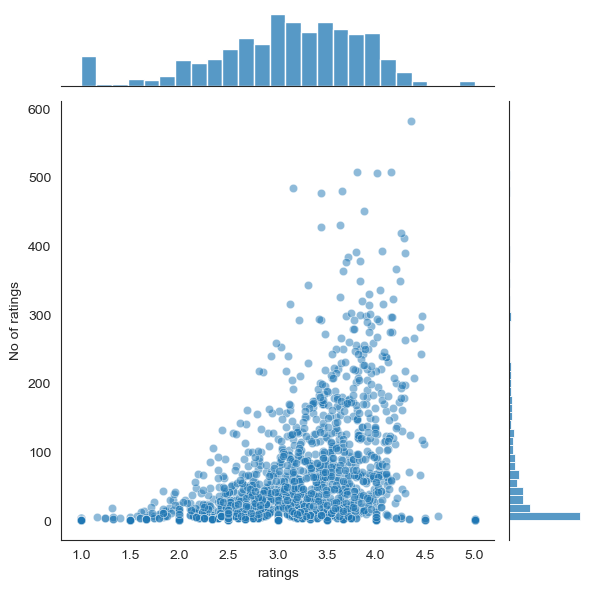

In [68]:
#alpha is opacity
sns.jointplot(x = 'ratings', y='No of ratings' , data= ratings, alpha = 0.5 )


In [69]:
moviemat = df.pivot_table(index = "user_id", columns="title",values = "ratings")

In [70]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [71]:
#which movie has highest no of rating?
ratings.sort_values("No of ratings" , ascending= False)

,ratings,No of ratings
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
...,...,...
"Great Day in Harlem, A (1994)",5.000000,1
"Other Voices, Other Rooms (1997)",3.000000,1
Good Morning (1971),1.000000,1


In [115]:
# which user has given which rating
starwar_user_ratings = moviemat['Star Wars (1977)']
starwar_user_ratings.head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [116]:
# Creating co realtion of star wars with other movies

In [117]:
similar_to_starwar = moviemat.corrwith(starwar_user_ratings)

In [118]:
# create dataframe of title with correlation

In [119]:
corr_starwars = pd.DataFrame(similar_to_starwar, columns = ['correlation'])


In [96]:
#inplace means dataframe has to make permanenet change, incase of false : we get copy of original dataframe
corr_starwars.dropna(inplace = True)

In [120]:
corr_starwars.head(10)

,correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398
2 Days in the Valley (1996),0.066654
"20,000 Leagues Under the Sea (1954)",0.289768
2001: A Space Odyssey (1968),0.230884
3 Ninjas: High Noon At Mega Mountain (1998),NaN


In [107]:
# to recommend , we will consider highest correlation
corr_starwars.sort_values('correlation', ascending = False).head(5)

,correlation
title,
Man of the Year (1995),1.0
Hollow Reed (1996),1.0
Stripes (1981),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [99]:
# suppose 500 people have rated starwars as 5 star out of 560 total no of rating. 
# Now in hallow red there are only 10 ratings and out of which 6 has rated 5 star.
# and let say the those where the same persom who is gave 5 star rating to both movies.
# thus the correaltion is showing as 1.
# but this correaltion is and considerable so we need to put a threshold . example : recommend movies 
# who has more than 100 ratings.

In [124]:
 corr_starwars =corr_starwars.join(ratings['No of ratings'])
corr_starwars.head()

,correlation,No of ratings
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [121]:
print(ratings.columns)

Index(['ratings', 'No of ratings'], dtype='object')


In [127]:
corr_starwars[corr_starwars['No of ratings']> 100].sort_values('correlation', ascending = False)

,correlation,No of ratings
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
...,...,...
"Edge, The (1997)",-0.127167,113
As Good As It Gets (1997),-0.130466,112
Crash (1996),-0.148507,128


Predict Function

In [131]:
def predict_movies(movie_name):
    movie_user_ratings = moviemat[movie_name]
    # now find correaltion
    similar_to_movie = moviemat.corrwith(movie_user_ratings)
    # create dataframe
    corr_movie = pd.DataFrame(similar_to_movie, columns = ['correlation'])
    corr_movie.dropna(inplace = True)
    # join
    corr_movie =corr_movie.join(ratings['No of ratings'])
    predictions = corr_movie[corr_movie['No of ratings']> 100].sort_values('correlation', ascending = False)
    return predictions

In [132]:
predictions = predict_movies('Titanic (1997)')
predictions.head()

,correlation,No of ratings
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
